In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob


In [14]:
day = "G1"
data_folder = f"../data/{day}"
files = glob.glob(os.path.join(data_folder, '*-resampled.csv'))




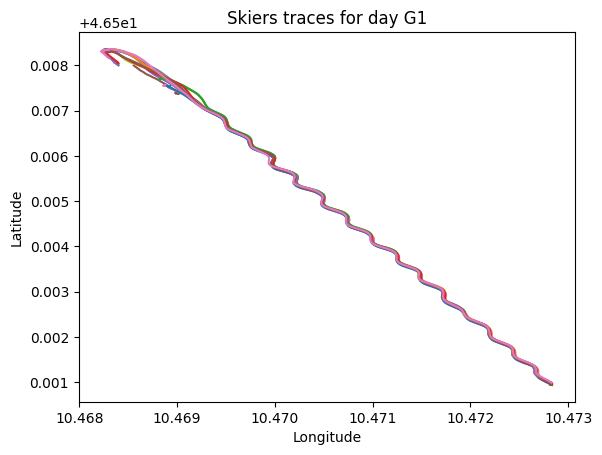

In [15]:
for skier_file in files:
    df = pd.read_csv(skier_file)

    plt.plot(df["GNSS_Longitude"], df["GNSS_Latitude"])

plt.title(f"Skiers traces for day {day}")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.savefig(f"../figures/skiers_traces_day_{day}")
plt.show()